# Multivariate Timeseries Classification

In this project we have 205 samples of 89 rows each with 14 different features. The problem is similar to activity recognition and is solved using both traditional machine learning using feature engineering and also, using deep learning using LSTM, CNN1D-LSTM and CNN2D-LSTM. 

### Import Necessary Files

In [1]:
from data_loader import DataLoader
from preprocessing import prepare_data
from models import FeatureEngineeredModel, DeepLearningModel
from utils import plot_confusion_matrix, plot_class_distribution, plot_best_accuracies

Using TensorFlow backend.


### Data File

In [2]:
data_file = "challenge_dataset.xlsx"

### Train and Test files

In [3]:
train_file = "train.csv"
test_file = "test.csv"

### Test size of 20%

In [4]:
test_size = 0.2

### Prepare train and test datasets
prepare_data() renames "ID_TestSet" to "id" and splits the data into train and test set and creates two new csv files which are used for training and testing models

In [5]:
data = prepare_data(data_file, train_file, test_file, test_size, gen=False)

### Visualize the distribution of different classes

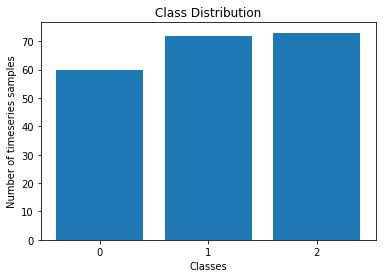

In [6]:
classes = data.groupby("goal").id.count()
plot_class_distribution(classes)

### Define dataset loader

In [7]:
data_loader = DataLoader(train_file, test_file)

### Feature Engineered Model

FeatureEngineeredModel in ints constructor extracts and selects the relevant features

In [8]:
X_train, y_train, X_test, y_test, train_ids, test_ids = data_loader.get_train_test_data()
traditional_model = FeatureEngineeredModel(X_train, y_train, X_test, y_test, train_ids, test_ids)

Feature Extraction: 100%|██████████| 30/30 [01:19<00:00,  2.66s/it]
 'bl__fft_coefficient__coeff_45__attr_"angle"'
 'bl__fft_coefficient__coeff_45__attr_"imag"' ...
 'vz__fft_coefficient__coeff_99__attr_"angle"'
 'vz__fft_coefficient__coeff_99__attr_"imag"'
 'vz__fft_coefficient__coeff_99__attr_"real"'] did not have any finite values. Filling with zeros.


Selected Features: 578/11116


### Evaluate RandomForest and XGBoost for various num estimators and determine the best model

In [9]:
tm_best_model, tm_best_score = traditional_model.evaluate()

Training Random Forest
Accuracy: 68.29268292682927% with n_estimators=150
Training XGBoost
Accuracy: 63.41463414634146% with n_estimators=100


### Deep Learning Models - LSTM, CNN1D-LSTM, CNN2D-LSTM

In [10]:
X_train, y_train, X_test, y_test, train_ids, test_ids = data_loader.get_train_test_data_norm()
deep_learning_model = DeepLearningModel(X_train, y_train, X_test, y_test, train_ids, test_ids)

### Training the three deep learning architectures 5 times to get average and best accuracy

In [11]:
dl_best_model, dl_best_score = deep_learning_model.evaluate()

Training LSTM
Accuracy: Max:65.85365882733973% Avg:59.024% (+/-4.729)
Training CNN1D-LSTM
Accuracy: Max:68.29268336296082% Avg:61.463% (+/-5.208)
Training CNN2D-LSTM
Accuracy: Max:63.41463443709583% Avg:58.537% (+/-5.116)


### Plot Confusion Matrices

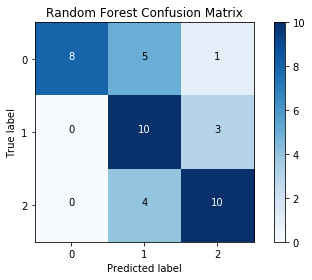

In [12]:
plot_confusion_matrix(traditional_model.get_confusion_matrix(), classes = [0,1,2], 
                      title = traditional_model.best_model_name + " Confusion Matrix")

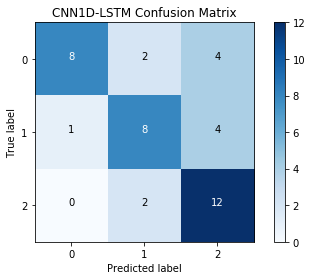

In [13]:
plot_confusion_matrix(deep_learning_model.get_confusion_matrix(), classes = [0,1,2], 
                      title = deep_learning_model.best_model_name + " Confusion Matrix")

### Comparison of the Accuracy of the best models of the five algorithms or architectures

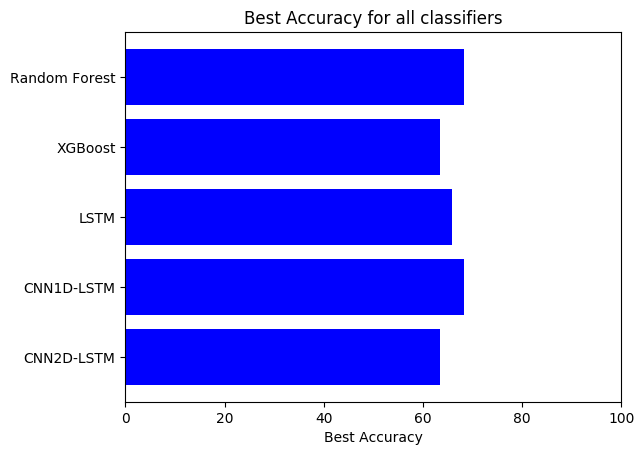

In [14]:
model_names = traditional_model.model_names.copy()
model_names.extend(deep_learning_model.model_names)
accuracies = traditional_model.scores.copy()
accuracies.extend(deep_learning_model.scores)

plot_best_accuracies(model_names, accuracies)